In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c815bcd4deb3ea067b2984b951f15bfc


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | eydhafushi
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | hasilpur
Processing Record 11 of Set 1 | yulara
Processing Record 12 of Set 1 | ballina
Processing Record 13 of Set 1 | dingle
Processing Record 14 of Set 1 | viedma
Processing Record 15 of Set 1 | coquimbo
Processing Record 16 of Set 1 | aksu
Processing Record 17 of Set 1 | saldanha
Processing Record 18 of Set 1 | senneterre
Processing Record 19 of Set 1 | buala
Processing Record 20 of Set 1 | moulmeingyun
City not found. Skipping...
Processing Record 21 of Set 1 | spornoye
Processing Record 22 of Set 1 

Processing Record 35 of Set 4 | calategas
City not found. Skipping...
Processing Record 36 of Set 4 | salinas
Processing Record 37 of Set 4 | makakilo city
Processing Record 38 of Set 4 | matay
Processing Record 39 of Set 4 | pinheiro machado
Processing Record 40 of Set 4 | port alfred
Processing Record 41 of Set 4 | kaili
Processing Record 42 of Set 4 | mnogovershinnyy
Processing Record 43 of Set 4 | namibe
Processing Record 44 of Set 4 | geraldton
Processing Record 45 of Set 4 | totma
Processing Record 46 of Set 4 | pangai
Processing Record 47 of Set 4 | saryshagan
City not found. Skipping...
Processing Record 48 of Set 4 | oksfjord
Processing Record 49 of Set 4 | saint charles
Processing Record 50 of Set 4 | samusu
City not found. Skipping...
Processing Record 1 of Set 5 | kavieng
Processing Record 2 of Set 5 | antalaha
Processing Record 3 of Set 5 | koungou
Processing Record 4 of Set 5 | winnemucca
Processing Record 5 of Set 5 | labutta
City not found. Skipping...
Processing Record

Processing Record 24 of Set 8 | noumea
Processing Record 25 of Set 8 | coahuayana
Processing Record 26 of Set 8 | glubokoe
City not found. Skipping...
Processing Record 27 of Set 8 | husavik
Processing Record 28 of Set 8 | rungata
City not found. Skipping...
Processing Record 29 of Set 8 | cap malheureux
Processing Record 30 of Set 8 | mitu
Processing Record 31 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 32 of Set 8 | lakatoro
Processing Record 33 of Set 8 | bilibino
Processing Record 34 of Set 8 | pitimbu
Processing Record 35 of Set 8 | salalah
Processing Record 36 of Set 8 | sibolga
Processing Record 37 of Set 8 | fethiye
Processing Record 38 of Set 8 | hirara
Processing Record 39 of Set 8 | lata
Processing Record 40 of Set 8 | atar
Processing Record 41 of Set 8 | polson
Processing Record 42 of Set 8 | zhangye
Processing Record 43 of Set 8 | alice springs
Processing Record 44 of Set 8 | rock springs
Processing Record 45 of Set 8 | plettenberg bay
Processing

Processing Record 13 of Set 12 | vilhena
Processing Record 14 of Set 12 | nhulunbuy
Processing Record 15 of Set 12 | bosaso
Processing Record 16 of Set 12 | perwez
Processing Record 17 of Set 12 | ginir
Processing Record 18 of Set 12 | awjilah
Processing Record 19 of Set 12 | mount gambier
Processing Record 20 of Set 12 | urumqi
Processing Record 21 of Set 12 | karpogory
Processing Record 22 of Set 12 | oshnaviyeh
Processing Record 23 of Set 12 | havelock
Processing Record 24 of Set 12 | sawtell
Processing Record 25 of Set 12 | pingliang
Processing Record 26 of Set 12 | rodino
Processing Record 27 of Set 12 | marienburg
Processing Record 28 of Set 12 | yining
Processing Record 29 of Set 12 | thunder bay
Processing Record 30 of Set 12 | west odessa
Processing Record 31 of Set 12 | duz
City not found. Skipping...
Processing Record 32 of Set 12 | fagernes
Processing Record 33 of Set 12 | bouna
Processing Record 34 of Set 12 | fort nelson
Processing Record 35 of Set 12 | nueva armenia
Proc

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,24.80,58,90,11.50,CA,2021-04-20 03:10:49
1,Arraial Do Cabo,-22.9661,-42.0278,74.23,79,50,29.66,BR,2021-04-20 03:08:16
2,Albany,42.6001,-73.9662,48.00,66,33,4.05,US,2021-04-20 03:08:11
3,Qaqortoq,60.7167,-46.0333,32.00,59,97,3.65,GL,2021-04-20 03:10:50
4,Eydhafushi,5.1033,73.0708,82.72,67,65,4.92,MV,2021-04-20 03:10:50
5,Rikitea,-23.1203,-134.9692,78.26,71,4,8.14,PF,2021-04-20 03:10:50
6,Dikson,73.5069,80.5464,1.87,89,7,4.97,RU,2021-04-20 03:10:51
7,Tuktoyaktuk,69.4541,-133.0374,26.60,86,20,5.75,CA,2021-04-20 03:07:39
8,Hasilpur,29.7122,72.5553,82.09,30,99,12.93,PK,2021-04-20 03:10:51
9,Yulara,-25.2406,130.9889,77.00,18,0,9.22,AU,2021-04-20 03:10:51


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1618890419.0745568

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig1.png'

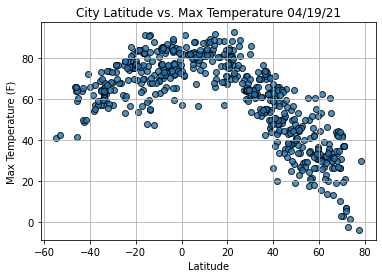

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()